In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prática Integrada - ICD  IAM
#### 💻 Vitor Rodrigues Ferreira - TSI-N 2022
#### 💻 Nínive Helen - TSI-N 2022


# Primeiro Entregável

## Coleta de Dados

In [ ]:
from pandas import DataFrame, Series, concat
import os, time
import numpy

def fetch_raw_data():
  # os.system("wget -O data.zip https://drive.google.com/u/0/uc?id=1xdHaCrNs9sLbO5otCcKoR2TsO2-Uhhnv&export=download")
  # time.sleep(3)
  os.system("unzip data.zip")

fetch_raw_data()

def extract_data_from(filename):
  entry = {}
  meta = filename[14: -4]
  entry["date"] = meta[0: 19]

  meta = meta[20:].split("-")
  entry["activity"] = meta[0]
  entry["gender"] = meta[1][0]
  entry["number"] = meta[1][1]
  return entry

def create_dataframe():
  base_dir = "HMP_Dataset"
  dfs = []

  folders = ["Brush_teeth", "Climb_stairs", "Comb_hair", "Descend_stairs",
             "Drink_glass", "Eat_meat", "Eat_soup", "Getup_bed",
             "Liedown_bed", "Pour_water", "Sitdown_chair",
             "Standup_chair", "Use_telephone", "Walk"] # já sem os do tipo MODEL

  for folder in folders:
    for filename in os.listdir(f'{base_dir}/{folder}'):
      x_axis, y_axis, z_axis = [], [], []
      entry_data = extract_data_from(filename)

      file1 = open(f'{base_dir}/{folder}/{filename}', 'r')
      
      for line in file1.readlines():
        values = line.strip().split(" ")
        x_axis.append(values[0])
        y_axis.append(values[1])
        z_axis.append(values[2])

      entry_data["x_axis"] = Series(x_axis).astype(float)
      entry_data["y_axis"] = Series(y_axis).astype(float)
      entry_data["z_axis"] = Series(z_axis).astype(float)

      dfs.append(DataFrame(entry_data))
      break

  df_merged = concat(dfs)
  return df_merged

create_dataframe()

,date,activity,gender,number,x_axis,y_axis,z_axis
0,2011-05-30-09-36-50,brush_teeth,f,1,16.0,45.0,34.0
1,2011-05-30-09-36-50,brush_teeth,f,1,16.0,45.0,33.0
2,2011-05-30-09-36-50,brush_teeth,f,1,16.0,44.0,35.0
3,2011-05-30-09-36-50,brush_teeth,f,1,16.0,46.0,36.0
4,2011-05-30-09-36-50,brush_teeth,f,1,15.0,44.0,36.0
...,...,...,...,...,...,...,...
490,2011-05-31-16-32-12,walk,f,1,39.0,35.0,55.0
491,2011-05-31-16-32-12,walk,f,1,39.0,34.0,53.0
492,2011-05-31-16-32-12,walk,f,1,39.0,34.0,53.0
493,2011-05-31-16-32-12,walk,f,1,39.0,34.0,51.0


## Exploração

In [ ]:
#importando biblioteca matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Entendo melhor os valores das variaveis numericas. Suas metricas
df.describe()

,x_axis,y_axis,z_axis,axis_avg
count,13703.000000,13703.000000,13703.000000,13703.000000
mean,32.648252,40.722834,44.032913,39.134666
std,10.078572,9.369152,8.456342,5.187204
min,0.000000,0.000000,3.000000,16.333333
25%,27.000000,37.000000,39.000000,36.333333
50%,35.000000,40.000000,47.000000,41.333333
75%,40.000000,47.000000,50.000000,43.000000
max,63.000000,63.000000,63.000000,55.666667


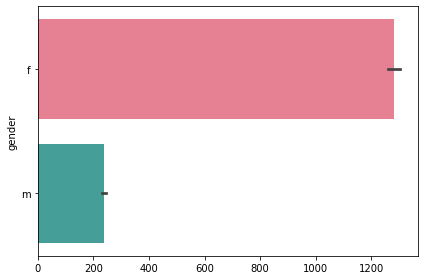

In [ ]:
#Grafico quantidade genero
fig, ax = plt.subplots()
#criando o gráfico de barras 
sns.barplot(x=df.index, y=df['gender'], ax=ax, palette ="husl",data=df)
#otimizar espaço da figure
fig.tight_layout();

In [ ]:
#Correlaçao Entre as variaveis x_axis,	y_axis,z_axis,axis_avg. Tabela 
df[['x_axis',	'y_axis',	'z_axis','axis_avg']].corr()

,x_axis,y_axis,z_axis,axis_avg
x_axis,1.000000,-0.076845,0.309739,0.769705
y_axis,-0.076845,1.000000,-0.359647,0.356863
z_axis,0.309739,-0.359647,1.000000,0.527483
axis_avg,0.769705,0.356863,0.527483,1.000000


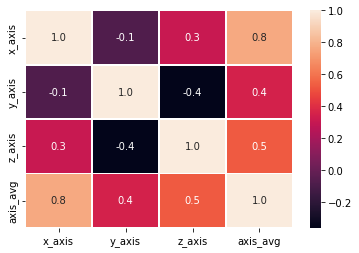

In [ ]:
#Correlação das variaveis
#valores negativos indicam correlação inversa, isto é, quando um cresce o outro diminui; 
#positivos indicam crescimento uniforme, ou seja, ambas crescem ou ambas diminuem; os valores vão de -1 a +1 e 
#quanto mais próximo do valor absoluto 1, mais forte a ligação entre as duas variáveis). 
#Perceba que a correlação de uma variável com ela mesma sempre será 1.
correlacao =df[['x_axis',	'y_axis',	'z_axis','axis_avg']].corr()
correlacao
#Matriz de correlação
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot

Text(0, 0.5, 'distribuição')

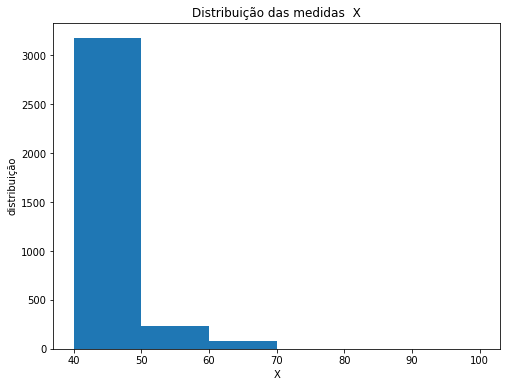

In [ ]:
#Grafico de histograma das variaçoes da variavel X
x = df['x_axis']
plt.figure(figsize=(8, 6))
plt.hist(x, bins=range(40, 110,10))
plt.title('Distribuição das medidas  X')
plt.xlabel('X')
plt.ylabel('distribuição')

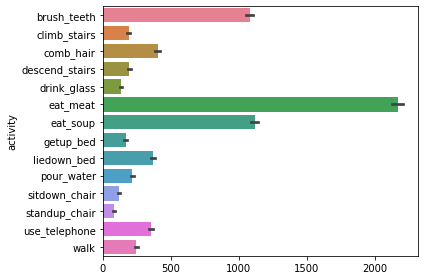

In [ ]:
#Grafico Tipo de movimento
fig, ax = plt.subplots()
#criando o gráfico de barras 
sns.barplot(x=df.index, y=df['activity'], ax=ax, palette ="husl",data=df)
#otimizar espaço da figure
fig.tight_layout();

## Preparação

In [ ]:
# Nova coluna de Média entre eixos => axis_avg
df = create_dataframe()
df['axis_avg'] = df.apply(lambda df: numpy.average([df.x_axis, df.y_axis, df.z_axis]), axis=1)
df

,date,activity,gender,number,x_axis,y_axis,z_axis,axis_avg
0,2011-05-30-09-36-50,brush_teeth,f,1,16.0,45.0,34.0,31.666667
1,2011-05-30-09-36-50,brush_teeth,f,1,16.0,45.0,33.0,31.333333
2,2011-05-30-09-36-50,brush_teeth,f,1,16.0,44.0,35.0,31.666667
3,2011-05-30-09-36-50,brush_teeth,f,1,16.0,46.0,36.0,32.666667
4,2011-05-30-09-36-50,brush_teeth,f,1,15.0,44.0,36.0,31.666667
...,...,...,...,...,...,...,...,...
490,2011-05-31-16-32-12,walk,f,1,39.0,35.0,55.0,43.000000
491,2011-05-31-16-32-12,walk,f,1,39.0,34.0,53.0,42.000000
492,2011-05-31-16-32-12,walk,f,1,39.0,34.0,53.0,42.000000
493,2011-05-31-16-32-12,walk,f,1,39.0,34.0,51.0,41.333333


In [ ]:
# Correlação entre eixos e axis_avg
for axis in ['x', 'y', 'z']:
  corr = df[f'{axis}_axis'].corr(df['axis_avg'])
  print(f'A correlação entre o eixo {axis} e a média entre eixos é de: {corr}')

A correlação entre o eixo x e a média entre eixos é de: 0.7697054507002242
A correlação entre o eixo y e a média entre eixos é de: 0.35686309576263586
A correlação entre o eixo z e a média entre eixos é de: 0.527482721572544
